In [1]:
import os
os.chdir('/home/rwb/github/thesis_experiments')
import os
import sys
import logging
import time
import simpy

import pandas as pd

sys.path.insert(0, os.path.abspath('../../thesis_experiments'))
sys.path.insert(0, os.path.abspath('../../topsim_pipelines'))

global_sim = pd.read_pickle('hopefully_final_scheduling_update.pkl')

In [60]:
df = global_sim.groupby(['planning','delay', 'config']).size().astype(float).reset_index(name='time').sort_values(by=['planning'])
df['config'] = df['config'].str.replace('visualisation_playground/sim_config/single_size/40cluster/mos_sw','').str.strip('.json').astype(float)
config = 'visualisation_playground/sim_config/single_size/40cluster/mos_sw40.json'
# global_sim[(global_sim['config']==config) & (global_sim['planning']=='heft')]['finished_tasks']
# global_sim[(global_sim['config']==config) & (global_sim['planning']=='fcfs')]['finished_tasks']
basetime = pd.Series(df[df['planning'] == 'fcfs']['time'])
basetime = basetime.append(basetime,ignore_index=True)
df['increase'] = basetime/df['time']
df

,planning,delay,config,time,increase
0,fcfs,0,10.0,874.0,1.000000
1,fcfs,0,20.0,975.0,1.000000
2,fcfs,0,40.0,1720.0,1.000000
3,fcfs,0,60.0,2330.0,1.000000
4,fcfs,0,80.0,2967.0,1.000000
5,heft,0,10.0,874.0,1.000000
6,heft,0,20.0,953.0,1.023085
7,heft,0,40.0,1563.0,1.100448
8,heft,0,60.0,2199.0,1.059573
9,heft,0,80.0,2829.0,1.048780


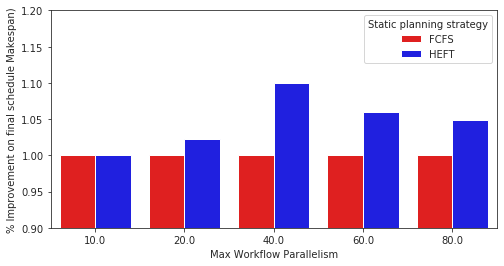

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
# g = sns.FacetGrid(df, col='delay',height=8, aspect=0.5)
# plt.figure(figsize=(18,8))
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(8,4))
plot = sns.barplot(data=df,x='config', y='increase', hue='planning', palette=['red','blue'],
axes=ax)
h, l = ax.get_legend_handles_labels()
ax.legend(h,['FCFS','HEFT'], title='Static planning strategy',loc='upper right')
ax.set_ylabel('% Improvement on final schedule Makespan)')
ax.set_xlabel('Max Workflow Parallelism')
ax.set(ylim=(0.9,1.2))
fig.savefig('ratio_comparison.png', format="png")

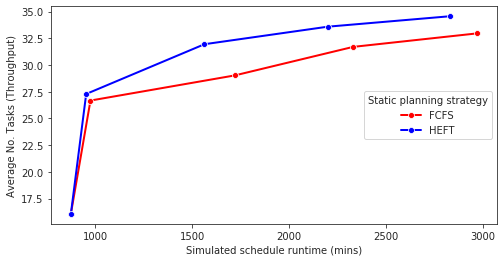

In [59]:
# plot=global_sim[global_sim['config']==config]
# # plot
# plt.figure(figsize=(18,8))
# sns.lineplot(data=plot,x=plot.index, y='available_resources',hue='planning')
df = global_sim.groupby(['planning','delay', 'config']).size().astype(float).reset_index(name='time').sort_values(by=['planning'])
df_tasks = global_sim.groupby(['planning','delay', 'config'])['running_tasks'].mean().astype(float).reset_index(name='mean_tasks').sort_values(by=['planning'])
df['config'] = df['config'].str.replace('visualisation_playground/sim_config/single_size/40cluster/mos_sw','').str.strip('.json').astype(float)
df_tasks['config'] =df_tasks['config'].str.replace('visualisation_playground/sim_config/single_size/40cluster/mos_sw','').str.strip('.json').astype(float)
# plt.figure(figsize=(8,))
fig, ax = plt.subplots(figsize=(8,4))
# df['mean'] = (df['mean_tasks']/40)*100
# df['mean_tasks']
plotdata = pd.merge(df, df_tasks, on=['planning', 'config'])
sns.lineplot(data=plotdata,x='time', y='mean_tasks',hue='planning',axes=ax,palette=['red','blue'],linewidth = 2,
            markers=['o','o'],style='planning',dashes=False)

ax.set_ylabel('Average No. Tasks (Throughput)')
ax.set_xlabel('Simulated schedule runtime (mins)')
ax.legend(title='Static planning strategy',labels=['FCFS','HEFT'],loc='center right')
plt.show()
fig.savefig('tasks_throughput.svg', format="svg")